# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
api_key = "9b62f6785b8cf8ea45ce7e01a863c0d9"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

661

In [4]:
#Format cities list into dictionary and then into dataframe
city_dict = {
    "City": cities,
}

city_df = pd.DataFrame(city_dict)

# Add additonal empty columns to dataframe
city_df["Country"] = ""
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""

#Display dataframe head
city_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,east london,,,,,,,
1,cherskiy,,,,,,,
2,castro,,,,,,,
3,ushuaia,,,,,,,
4,prudyanka,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Add base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Add query url to base
query_url = f"{url}appid={api_key}&units={units}&q="

# iterate through index and rows of city_df
for index, row in city_df.iterrows():
    
    name = row["City"]
    
    response = requests.get(query_url + name).json()
    
    #print a record of each city found
    try:
        print(f"Processing record # {index} | {name}.")
        
        #fill in the rest of the columns in the city_df table
        city_df.loc[index, "Country"] = response["sys"]["country"]
        city_df.loc[index, "Lat"] = response['coord']['lat']
        city_df.loc[index, "Lng"] = response['coord']['lon']
        city_df.loc[index, "Max Temp"] = response['main']['temp_max']
        city_df.loc[index, "Humidity"] = response['main']['humidity']
        city_df.loc[index, "Cloudiness"] = response['clouds']['all']
        city_df.loc[index, "Wind Speed"] = response['wind']['speed']
    
    #print any cities not found in the weatherpy api
    except (KeyError, IndexError):
        print("City not found... skipping.")
        
    # Space the API calls to be 1 second apart    
    time.sleep(1)  
    
print("---------------------------")
print("Data retrieval complete")
print("---------------------------")

Processing record # 0 | east london.
Processing record # 1 | cherskiy.
Processing record # 2 | castro.
Processing record # 3 | ushuaia.
Processing record # 4 | prudyanka.
Processing record # 5 | villamontes.
Processing record # 6 | college.
Processing record # 7 | ostrovnoy.
Processing record # 8 | hovd.
Processing record # 9 | erzin.
Processing record # 10 | port alfred.
Processing record # 11 | qaanaaq.
Processing record # 12 | sakakah.
City not found... skipping.
Processing record # 13 | avarua.
Processing record # 14 | melfi.
Processing record # 15 | luderitz.
Processing record # 16 | hobart.
Processing record # 17 | skelleftea.
Processing record # 18 | port elizabeth.
Processing record # 19 | naze.
Processing record # 20 | ingham.
Processing record # 21 | awjilah.
Processing record # 22 | yellowknife.
Processing record # 23 | mataura.
Processing record # 24 | rabo de peixe.
Processing record # 25 | barrow.
Processing record # 26 | lashio.
Processing record # 27 | cristinapolis.
Pr

Processing record # 210 | guerrero negro.
Processing record # 211 | teguise.
Processing record # 212 | edd.
Processing record # 213 | san ramon.
Processing record # 214 | tena.
Processing record # 215 | noumea.
Processing record # 216 | novyy urengoy.
Processing record # 217 | tunduru.
City not found... skipping.
Processing record # 218 | olafsvik.
City not found... skipping.
Processing record # 219 | hamilton.
Processing record # 220 | opuwo.
Processing record # 221 | daru.
Processing record # 222 | mountain home.
Processing record # 223 | faanui.
Processing record # 224 | pevek.
Processing record # 225 | massape.
City not found... skipping.
Processing record # 226 | aryanah.
City not found... skipping.
Processing record # 227 | westerland.
Processing record # 228 | tianpeng.
Processing record # 229 | leningradskiy.
Processing record # 230 | makakilo city.
Processing record # 231 | buraydah.
Processing record # 232 | tiksi.
Processing record # 233 | baykit.
Processing record # 234 | g

Processing record # 419 | saldanha.
Processing record # 420 | ngunguru.
Processing record # 421 | kushiro.
Processing record # 422 | boyolangu.
Processing record # 423 | oudtshoorn.
Processing record # 424 | atar.
Processing record # 425 | jalu.
Processing record # 426 | plettenberg bay.
Processing record # 427 | palabuhanratu.
City not found... skipping.
Processing record # 428 | kununurra.
Processing record # 429 | vardo.
Processing record # 430 | diamantino.
Processing record # 431 | karamea.
City not found... skipping.
Processing record # 432 | jogeva.
Processing record # 433 | umm ruwabah.
City not found... skipping.
Processing record # 434 | cuauhtemoc.
Processing record # 435 | gunjur.
Processing record # 436 | bell ville.
Processing record # 437 | tambun.
Processing record # 438 | mazatlan.
Processing record # 439 | megion.
Processing record # 440 | ondorhaan.
City not found... skipping.
Processing record # 441 | abu zabad.
Processing record # 442 | shimoda.
Processing record #

Processing record # 631 | fianga.
City not found... skipping.
Processing record # 632 | skagastrond.
City not found... skipping.
Processing record # 633 | rantepao.
Processing record # 634 | chippewa falls.
Processing record # 635 | cahors.
Processing record # 636 | conakry.
Processing record # 637 | mogadishu.
Processing record # 638 | north bend.
Processing record # 639 | paita.
Processing record # 640 | afonso claudio.
Processing record # 641 | andrelandia.
City not found... skipping.
Processing record # 642 | kulunda.
Processing record # 643 | hamada.
Processing record # 644 | palmer.
Processing record # 645 | rawannawi.
City not found... skipping.
Processing record # 646 | nishihara.
Processing record # 647 | itainopolis.
City not found... skipping.
Processing record # 648 | karratha.
Processing record # 649 | chibuto.
Processing record # 650 | abengourou.
Processing record # 651 | hoquiam.
Processing record # 652 | rocha.
Processing record # 653 | srandakan.
Processing record # 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#export dataframe to csv
city_df.to_csv("output_data/city_data.csv")

#drop rows with empty values
city_df = city_df.dropna()
city_df.count()

City          588
Country       588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


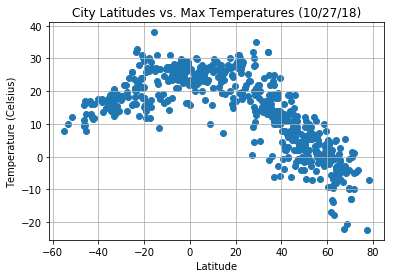

In [16]:
# Build a scatter plot
city_df['Max Temp'] = city_df['Max Temp'].convert_objects(convert_numeric=True)
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o")

# Add title and labels
plt.title("City Latitudes vs. Max Temperatures (10/27/18)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/MaxTempsinCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


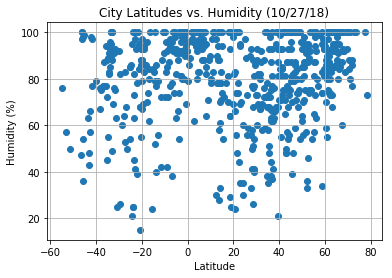

In [17]:
# Build a scatter plot
city_df['Humidity'] = city_df['Humidity'].convert_objects(convert_numeric=True)
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o")

# Add title and labels
plt.title("City Latitudes vs. Humidity (10/27/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/HumidityinCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


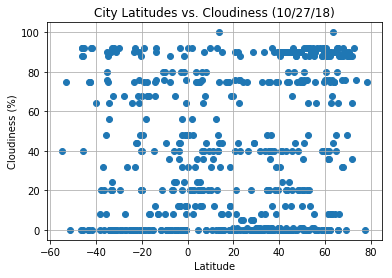

In [18]:
# Build a scatter plot
city_df['Cloudiness'] = city_df['Cloudiness'].convert_objects(convert_numeric=True)
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")

# Add title and labels
plt.title("City Latitudes vs. Cloudiness (10/27/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/CloudinessinCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


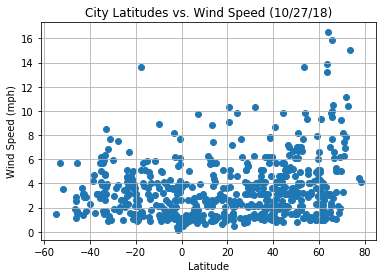

In [19]:
# Build a scatter plot
city_df['Wind Speed'] = city_df['Wind Speed'].convert_objects(convert_numeric=True)
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o")

# Add title and labels
plt.title("City Latitudes vs. Wind Speed (10/27/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/WindSpeedsinCities.png")

# Show plot
plt.show()

In [ ]:
#The temperature is higher within the tropics and near the equator.  There is a more significant drop in temperature in the northern hemisphere which makes sense because there are more cities closer to the pole in the north.

#There doesn't appear to be any meaningful relationship between latitude and wind speed.  There are a couple more outliers in the northern hemisphere with strong winds which might be related to proximity to the poles but we'd need more data to prove any relationship, if it exists.

#There doesn't appear to be any meaningful relationship between humidity and latitude either.  But I would be interested to see if there were any relationship between cloudiness and humidity as both have some connection to local moisture.